# Get the geometry of the IceCube detector

*Using the geometry.pdf file from the old test data site. See details in the testing directory*

*Before running*   
```$ cd ../testing/code/odf_tarball/; source env.sh; cd ../../../rawdata```

*I can't get that to work on Windows for some reason.*

In [ ]:
from geo_reader import read as read_geo

%load_ext autoreload
%autoreload 2

*Read in the data, following the code in pylab_2D_viewer.py*

In [2]:
geof = open("geometry.odf","rb")
geo = read_geo(geof)
x = [pos[0] for om,pos in geo.items() if om[0] ]
y = [pos[1] for om,pos in geo.items() if om[0] ]
z = [pos[2] for om,pos in geo.items() if om[0] ]


*Write to a csv file*

In [21]:
import csv

In [3]:
csvfile = open("IceCubeGeometry.csv", 'wt')	
csvwriter = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(x)):
    csvwriter.writerow([x[i],y[i],z[i]])
csvfile.close()

*Write to a "raw" file*

In [4]:
csvfile = open("IceCubeGeometry.raw", 'wt')	
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
for i in range(len(x)):
    csvwriter.writerow([x[i],y[i],z[i], 1., 2., 3., 4., 5., 6.])
csvfile.close()

*In Uniview, I'm noticing that the top parts don't really line up correctly for all points, and in some cases there are two points for a given line below (which also don't line up well).  I will fix this below and recreate the file.  I am also creating a tops file so that I can easily draw lines in Uniview*

In [49]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook

-513.6199951171869 1950.0799560546855 2463.6999511718723


<IPython.core.display.Javascript object>


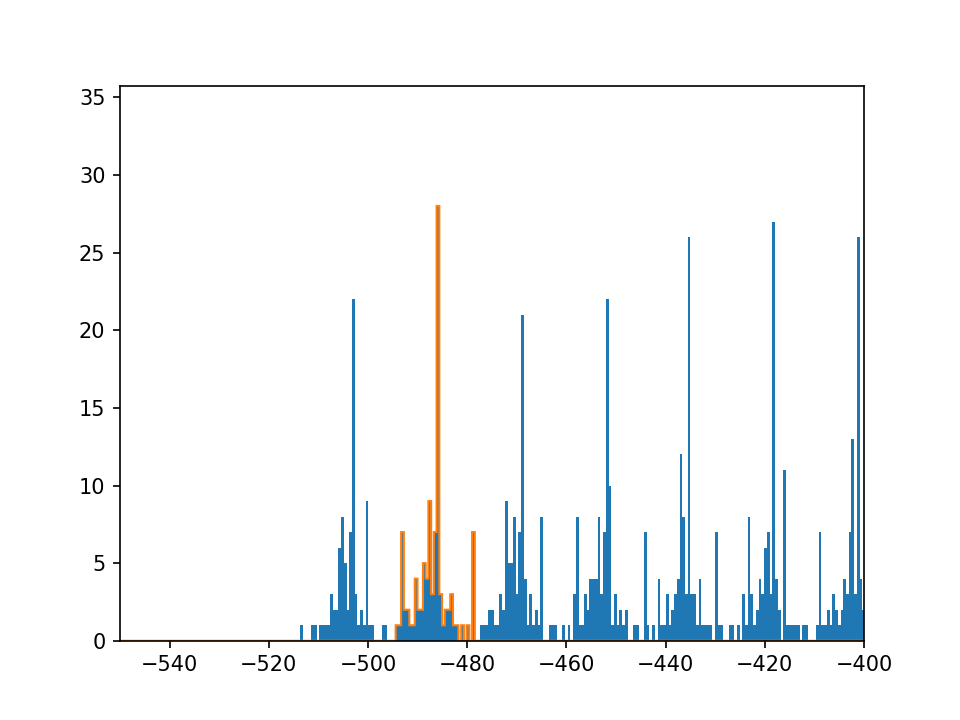

(-550, -400)

In [90]:
g = pd.read_csv('IceCubeGeometry.csv', header=None, names=['x','y','z','f1','f2','f3','f4','f5','f6'])
print(min(g['z']), max(g['z']), max(g['z'])-min(g['z']))
top = g.loc[g['z'] >= 1900]
bot = g.loc[g['z'] < 1900]
z = bot['z']
#maxBot = bot.loc[z > 490]
maxBot = bot.loc[(z > -495) & (z < -478)]

maxBot = maxBot.assign(zNew=np.full_like(maxBot['z'].values,1950.))
bot = bot.assign(zNew=bot['z'].values)

f,ax = plt.subplots()
bins = np.linspace(-550,550, 2000)
foo = ax.hist(z, bins=bins)
foo = ax.hist(maxBot['z'].values, bins=bins, histtype='step')
ax.set_xlim(-550,-400)

In [91]:
csvfile = open("IceCubeGeometryTop.raw", 'wt')	
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
x = maxBot['x'].values
y = maxBot['y'].values
z = maxBot['zNew'].values
for i in range(len(x)):
    csvwriter.writerow([x[i],y[i],z[i], 1., 2., 3., 4., 5., 6.])
csvfile.close()

#new raw data with fixed top line
frames = [bot, maxBot]
df = pd.concat(frames)
csvfile = open("IceCubeGeometry.raw", 'wt')	
csvwriter = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
x = df['x'].values
y = df['y'].values
z = df['zNew'].values
for i in range(len(x)):
    csvwriter.writerow([x[i],y[i],z[i], 1., 2., 3., 4., 5., 6.])
csvfile.close()

*A simple 3D scatter plot to check the data*


Text(0.5,0,'Z')

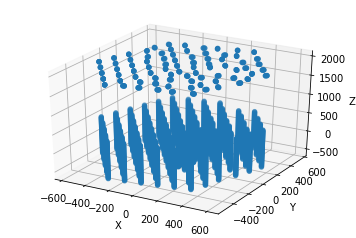

In [24]:
g = pd.read_csv('IceCubeGeometry.raw', sep=' ', header=None, names=['x','y','z','f1','f2','f3','f4','f5','f6'])
x = g['x'].values
y = g['y'].values
z = g['z'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')